<a href="https://colab.research.google.com/github/DrShabirAhmad/Code/blob/main/Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/cars24.csv")

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [4]:
df.groupby("make")["selling_price"].transform("mean")

0         4.684721
1         5.458819
2         5.458819
3         4.684721
4         5.858258
           ...    
19815    10.532763
19816     4.684721
19817     7.182097
19818     7.315421
19819     5.979902
Name: selling_price, Length: 19820, dtype: float64

In [5]:
# Target Encoding
df["make"] = df.groupby("make")["selling_price"].transform("mean")
df["model"]= df.groupby("model")["selling_price"].transform("mean")

In [6]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [8]:
y=df["selling_price"]

In [9]:
X = pd.DataFrame(min_max_scaler.fit_transform(df[["year", "km_driven", "mileage", "engine", "max_power", "age", "make", "model",
                                                  "Individual",	"Trustmark Dealer",	"Diesel",	"Electric",	"LPG",	"Petrol",
                                                  "Manual",	"5",	">5"]]), columns=["year", "km_driven", "mileage", "engine",
                                                                                   "max_power", "age", "make", "model",
                                                  "Individual",	"Trustmark Dealer",	"Diesel",	"Electric",	"LPG",	"Petrol",
                                                  "Manual",	"5",	">5"])

In [10]:
df1=X

In [11]:
df1.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [12]:
# Tain_Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=1)

In [13]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5576,0.896552,0.004974,0.142241,0.234301,0.195169,0.103448,0.232517,0.576277,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6660,0.896552,0.004974,0.145603,0.177281,0.123671,0.103448,0.194048,0.262018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19635,0.758621,0.016027,0.142241,0.236671,0.158615,0.241379,0.318156,0.176455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
11403,0.724138,0.018658,0.161207,0.221860,0.136618,0.275862,0.252367,0.229485,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8799,0.827586,0.014974,0.182759,0.184834,0.111111,0.172414,0.194048,0.212936,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
14690,0.586207,0.018395,0.112069,0.160841,0.000000,0.413793,0.232517,0.070465,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
134,0.793103,0.015237,0.182759,0.184834,0.111111,0.206897,0.194048,0.212936,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4982,0.862069,0.013132,0.183793,0.177429,0.115942,0.137931,0.324782,0.257968,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
11940,0.620690,0.018922,0.110345,0.221712,0.181965,0.379310,0.258412,0.157611,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10861,0.793103,0.018395,0.194741,0.184834,0.111111,0.206897,0.194048,0.240897,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [15]:
w= np.zeros(X_train.shape[1])
w0 = 0

In [16]:
def linear_regression(X, y, w, w0, iters=1000, ss=0.01):
  N = len(y)
  rss_1 = []
  for i in range(iters):
    y_pred = np.dot(X, w) + w0

    rss = np.square(np.subtract(y,y_pred)).mean()

    w_slope = -((y-y_pred).dot(2*X))/N
    w0_slope = -(2*np.sum(y-y_pred))/N

    w = w-ss*(w_slope)
    w0 = w0-ss*(w0_slope)
    rss_1.append(rss)
  return w, w0, rss_1


In [17]:
w, w0, rss_1 = linear_regression(X_train, y_train, w, w0, iters=1000, ss=0.01)

In [18]:
w

year                3.349441
km_driven          -0.092663
mileage            -0.173909
engine              1.689179
max_power           2.027811
age                -1.716167
make                4.370302
model               8.222291
Individual         -0.524808
Trustmark Dealer    0.037892
Diesel              1.319162
Electric            0.022449
LPG                -0.030898
Petrol              0.327263
Manual             -3.030952
5                   0.001064
>5                  1.203983
Name: selling_price, dtype: float64

In [19]:
w0

1.6332742194403056

<Axes: >

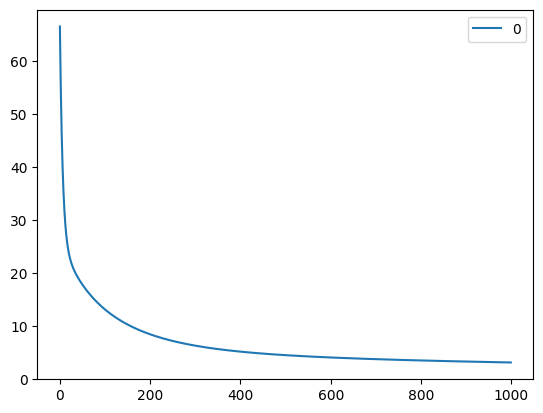

In [20]:
pd.DataFrame(rss_1).plot(kind="line")

In [21]:
y_pred_test = np.dot(X_test, w)+ w0

In [22]:
def R2(X, y):
  y_pred = np.dot(X, w)+w0
  rss = np.sum((y-y_pred)**2)
  tss = np.sum((y-y.mean())**2)
  R2 = 1- (rss/tss)
  return R2


In [23]:
R2(X_test, y_test)

0.8729853560506601